In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [2]:
project = 'rehersal ResNet CIFAR10 Task IL Adam v2'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining', 'learning_rate', 'epochs', 'optimizer'], y_min=30)

In [3]:
# viz.extract_all_runs_metrics_after_task_3()
viz.extract_all_runs_metrics()

In [4]:
viz.metrics_df

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,batch_size_rehearsal,pretraining,learning_rate,epochs,optimizer,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,stat-wmm;128;True;0.0001;5;Adam;,64.750000,71.06175,4.262501,81.800003,54.849998,65.199997,77.802188,8.683334,91.250000,...,128,True,0.0001,5,Adam,72.629999,72.699997,42.496998,6.919167,87.950000
1,stat-wmm;128;True;0.0001;5;Adam;,62.900002,79.05000,7.449999,92.699997,49.150002,63.849998,84.066250,10.300001,94.750000,...,128,True,0.0001,5,Adam,72.089999,75.099998,44.212750,7.145000,90.020000
2,stat-wmm;128;True;0.0001;5;Adam;,58.900002,81.22775,9.000000,94.900002,50.250000,59.549999,79.298125,10.799999,91.949997,...,128,True,0.0001,5,Adam,67.690000,66.900002,44.860296,9.995000,90.889999
3,stat-wmm;128;True;0.0001;5;Adam;,47.299999,64.04925,9.412499,84.949997,43.750000,78.050003,83.657188,5.099998,93.349998,...,128,True,0.0001,5,Adam,73.410000,78.050003,43.111206,6.292500,89.379999
4,stat-wmm;128;True;0.0001;5;Adam;,59.650002,72.84400,7.587500,90.000000,55.650002,66.099998,73.413750,6.083333,84.349998,...,128,True,0.0001,5,Adam,71.989999,70.849998,42.186026,6.569168,88.320001
5,stat-wmm;128;False;0.0001;5;Adam;,65.349998,76.64550,6.287500,90.500000,50.000000,56.500000,70.747188,9.766668,85.800003,...,128,False,0.0001,5,Adam,68.689999,65.349998,41.083582,7.430834,85.510001
6,stat-wmm;128;False;0.0001;5;Adam;,72.699997,71.98450,2.825001,84.000000,51.849998,55.000000,67.566562,7.399999,77.199997,...,128,False,0.0001,5,Adam,72.180000,72.699997,41.835001,6.709999,85.379999
7,stat-wmm;128;False;0.0001;5;Adam;,55.200001,73.85550,8.162499,87.849998,50.650002,79.199997,85.169375,4.666667,93.199997,...,128,False,0.0001,5,Adam,72.840000,75.750000,44.294487,7.855833,89.589998
8,stat-wmm;128;False;0.0001;5;Adam;,52.450001,59.38500,4.275001,69.550003,49.700001,73.349998,84.741250,6.666667,93.349998,...,128,False,0.0001,5,Adam,76.200001,73.349998,43.444104,5.083333,88.330000
9,stat-wmm;128;False;0.0001;5;Adam;,61.950001,67.33500,4.237500,78.900002,50.700001,62.349998,71.490000,9.583333,91.099998,...,128,False,0.0001,5,Adam,65.460000,65.949997,38.726792,6.454167,80.990001


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    # labels = [f"{uid.split(';')[0]} {uid.split(';')[1]} {uid.split(';')[2]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.title(f"metric: {metric_name}", fontsize=fontsize)
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf', bbox_inches='tight')
        plt.savefig("images/"+filename+".svg", format='svg', bbox_inches='tight')

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,batch_size_rehearsal,pretraining,learning_rate,epochs,optimizer,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,stat-wmm;128;True;0.0001;5;Adam;,64.750000,71.06175,4.262501,81.800003,54.849998,65.199997,77.802188,8.683334,91.250000,...,128,True,0.0001,5,Adam,72.629999,72.699997,42.496998,6.919167,87.950000
1,stat-wmm;128;True;0.0001;5;Adam;,62.900002,79.05000,7.449999,92.699997,49.150002,63.849998,84.066250,10.300001,94.750000,...,128,True,0.0001,5,Adam,72.089999,75.099998,44.212750,7.145000,90.020000
2,stat-wmm;128;True;0.0001;5;Adam;,58.900002,81.22775,9.000000,94.900002,50.250000,59.549999,79.298125,10.799999,91.949997,...,128,True,0.0001,5,Adam,67.690000,66.900002,44.860296,9.995000,90.889999
3,stat-wmm;128;True;0.0001;5;Adam;,47.299999,64.04925,9.412499,84.949997,43.750000,78.050003,83.657188,5.099998,93.349998,...,128,True,0.0001,5,Adam,73.410000,78.050003,43.111206,6.292500,89.379999
4,stat-wmm;128;True;0.0001;5;Adam;,59.650002,72.84400,7.587500,90.000000,55.650002,66.099998,73.413750,6.083333,84.349998,...,128,True,0.0001,5,Adam,71.989999,70.849998,42.186026,6.569168,88.320001
5,stat-wmm;128;False;0.0001;5;Adam;,65.349998,76.64550,6.287500,90.500000,50.000000,56.500000,70.747188,9.766668,85.800003,...,128,False,0.0001,5,Adam,68.689999,65.349998,41.083582,7.430834,85.510001
6,stat-wmm;128;False;0.0001;5;Adam;,72.699997,71.98450,2.825001,84.000000,51.849998,55.000000,67.566562,7.399999,77.199997,...,128,False,0.0001,5,Adam,72.180000,72.699997,41.835001,6.709999,85.379999
7,stat-wmm;128;False;0.0001;5;Adam;,55.200001,73.85550,8.162499,87.849998,50.650002,79.199997,85.169375,4.666667,93.199997,...,128,False,0.0001,5,Adam,72.840000,75.750000,44.294487,7.855833,89.589998
8,stat-wmm;128;False;0.0001;5;Adam;,52.450001,59.38500,4.275001,69.550003,49.700001,73.349998,84.741250,6.666667,93.349998,...,128,False,0.0001,5,Adam,76.200001,73.349998,43.444104,5.083333,88.330000
9,stat-wmm;128;False;0.0001;5;Adam;,61.950001,67.33500,4.237500,78.900002,50.700001,62.349998,71.490000,9.583333,91.099998,...,128,False,0.0001,5,Adam,65.460000,65.949997,38.726792,6.454167,80.990001


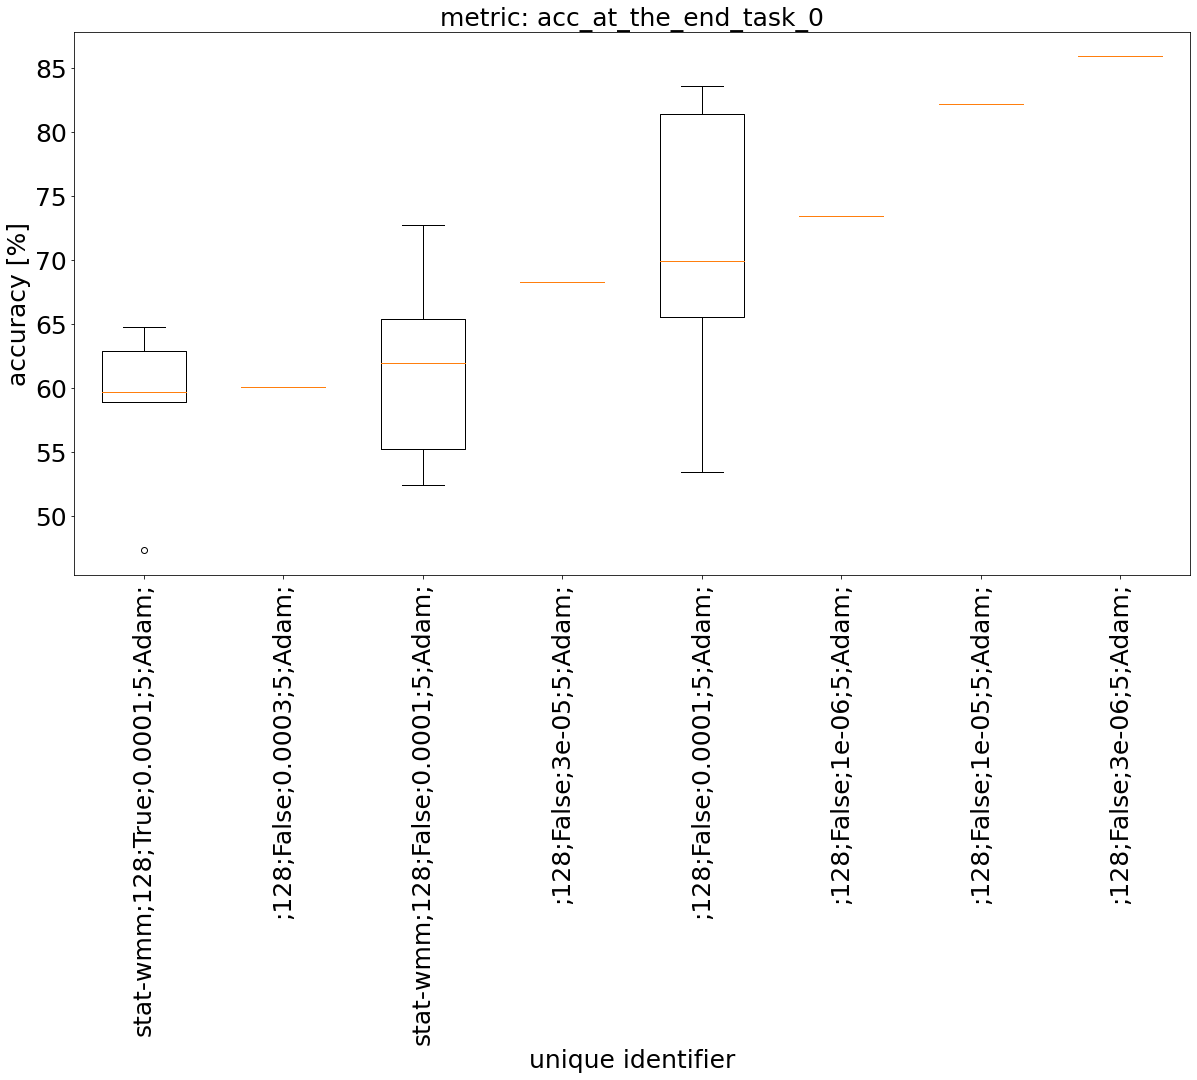

In [9]:
df = viz.metrics_df.copy()

# df = df[(df['learning_rate']=='0.003') & (df['epochs']=='5') & (df['batch_size_rehearsal']=='128')]

metric = 'acc_at_the_end_task_0'
# metric = 'acc_at_the_end_task_0'
box_plot(metric, df, f"box_dataset_resnet18_no_separate_{metric}", 25)

df

In [7]:
df.value_counts('UID')

UID
;128;False;0.0001;5;Adam;            5
stat-wmm;128;False;0.0001;5;Adam;    5
stat-wmm;128;True;0.0001;5;Adam;     5
;128;False;0.0003;5;Adam;            1
;128;False;1e-05;5;Adam;             1
;128;False;1e-06;5;Adam;             1
;128;False;3e-05;5;Adam;             1
;128;False;3e-06;5;Adam;             1
dtype: int64

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:404: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           70.76 &     79.45 &               4.76 &  test \\
    1 &           73.43 &     77.61 &               3.89 &  test \\
    2 &           76.25 &     81.36 &               6.56 &  test \\
    3 &           75.93 &     78.45 &               7.84 &  test \\
    4 &           93.31 &     91.48 &               0.00 &  test \\
\bottomrule
\end{tabular}



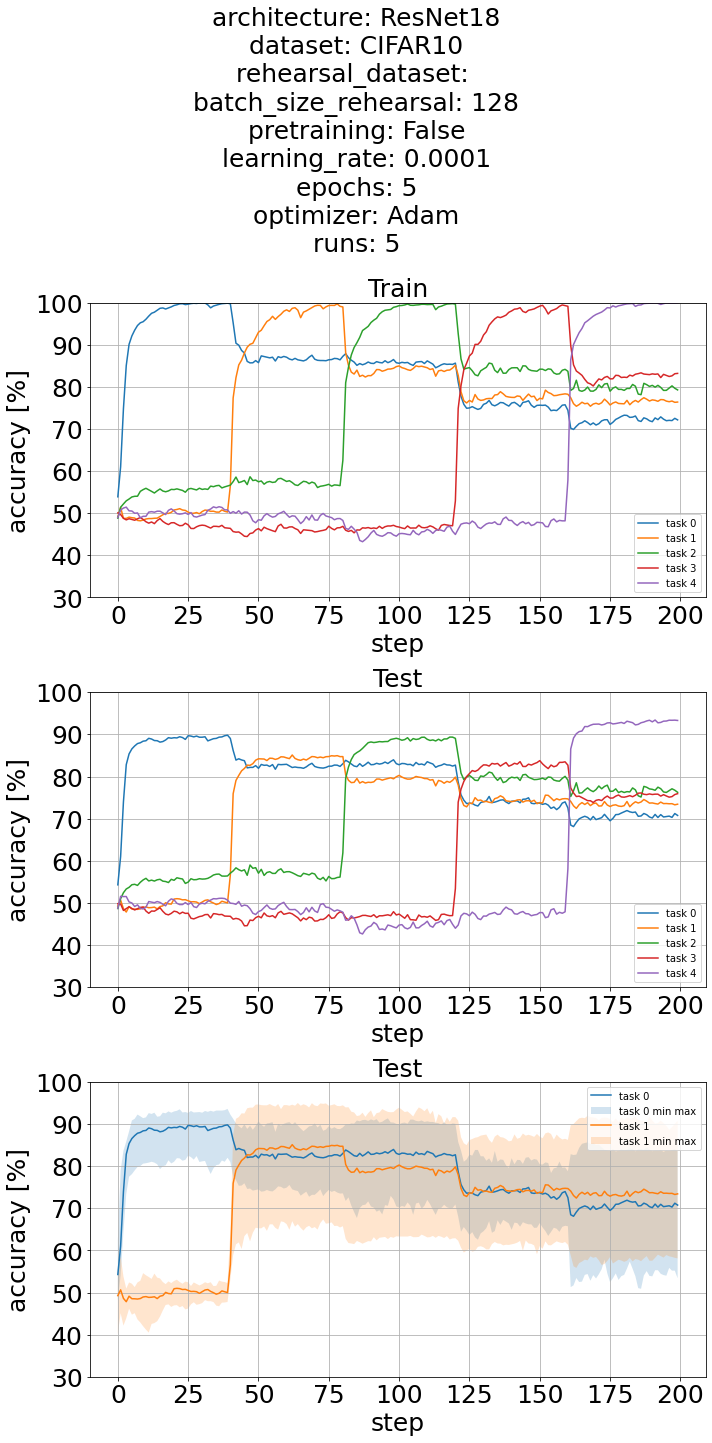

In [14]:
uid = ';128;False;0.0001;5;Adam'

viz.plot_single_setting_aggregated(uid, fontsize=25, filename=f"optimizer_{uid}", layout='vertical')

# All runs

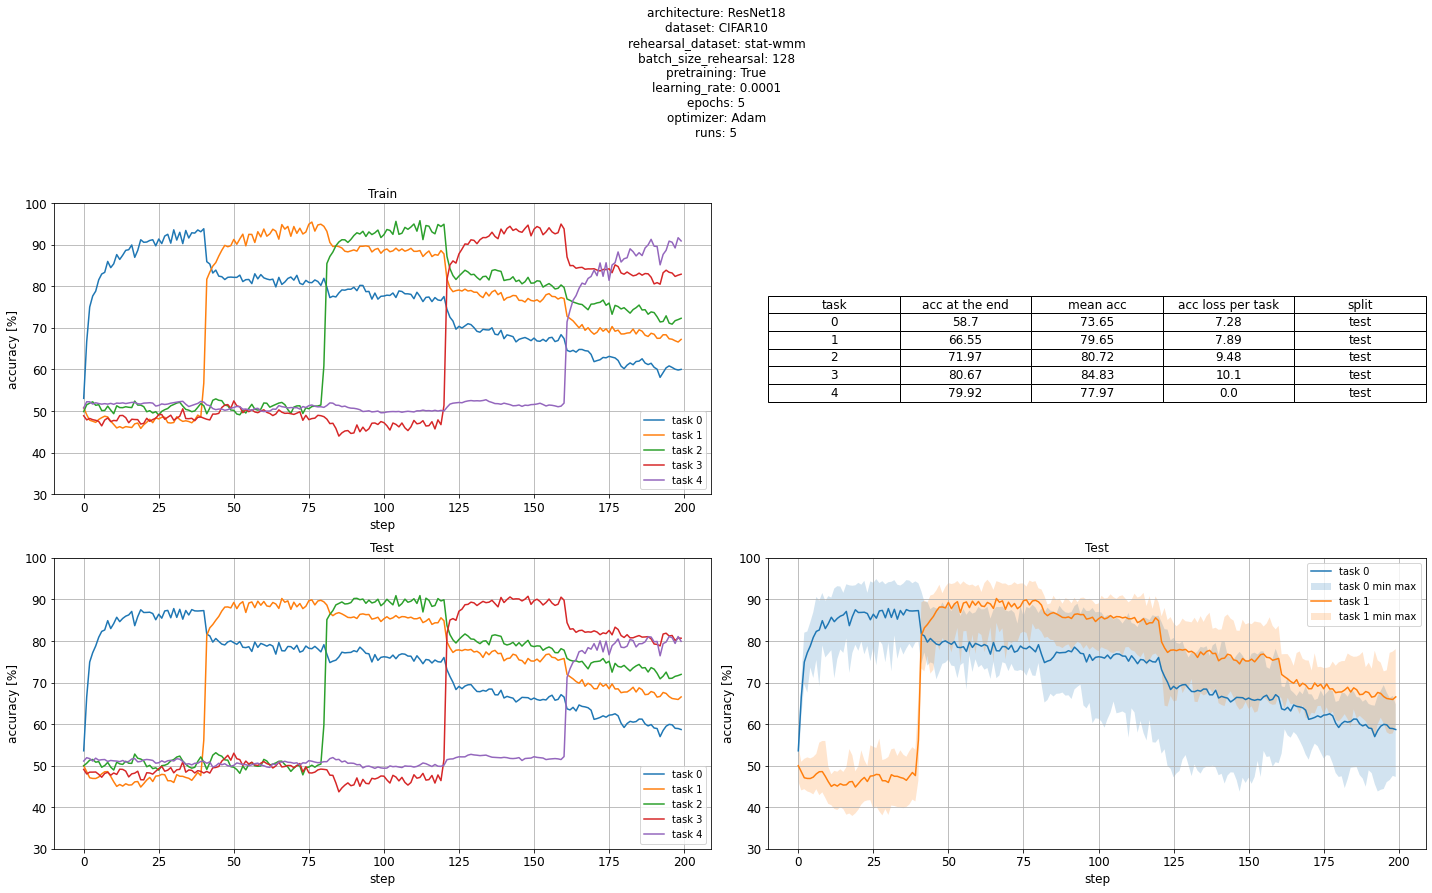

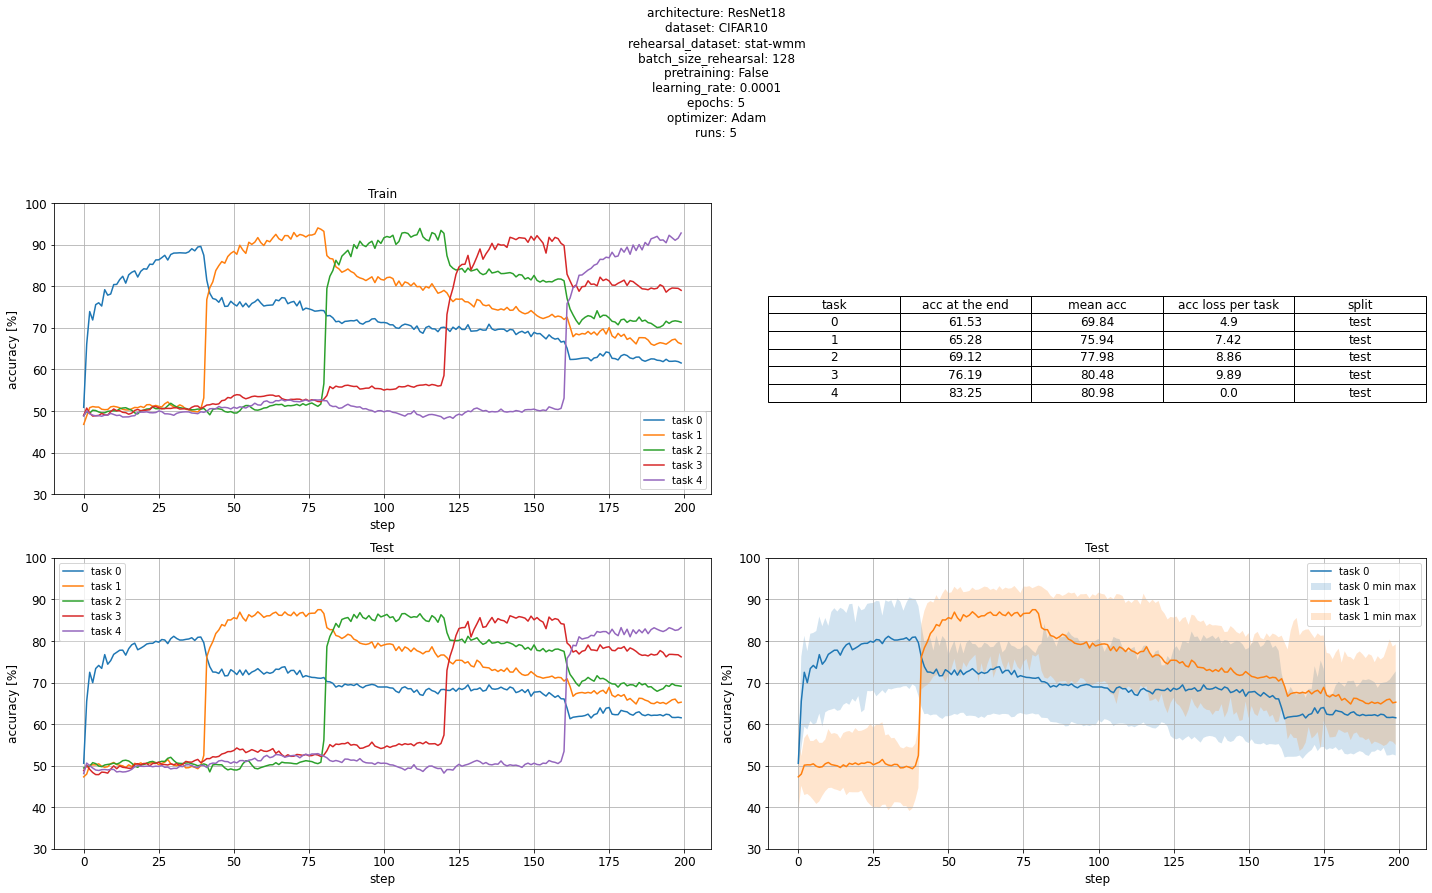

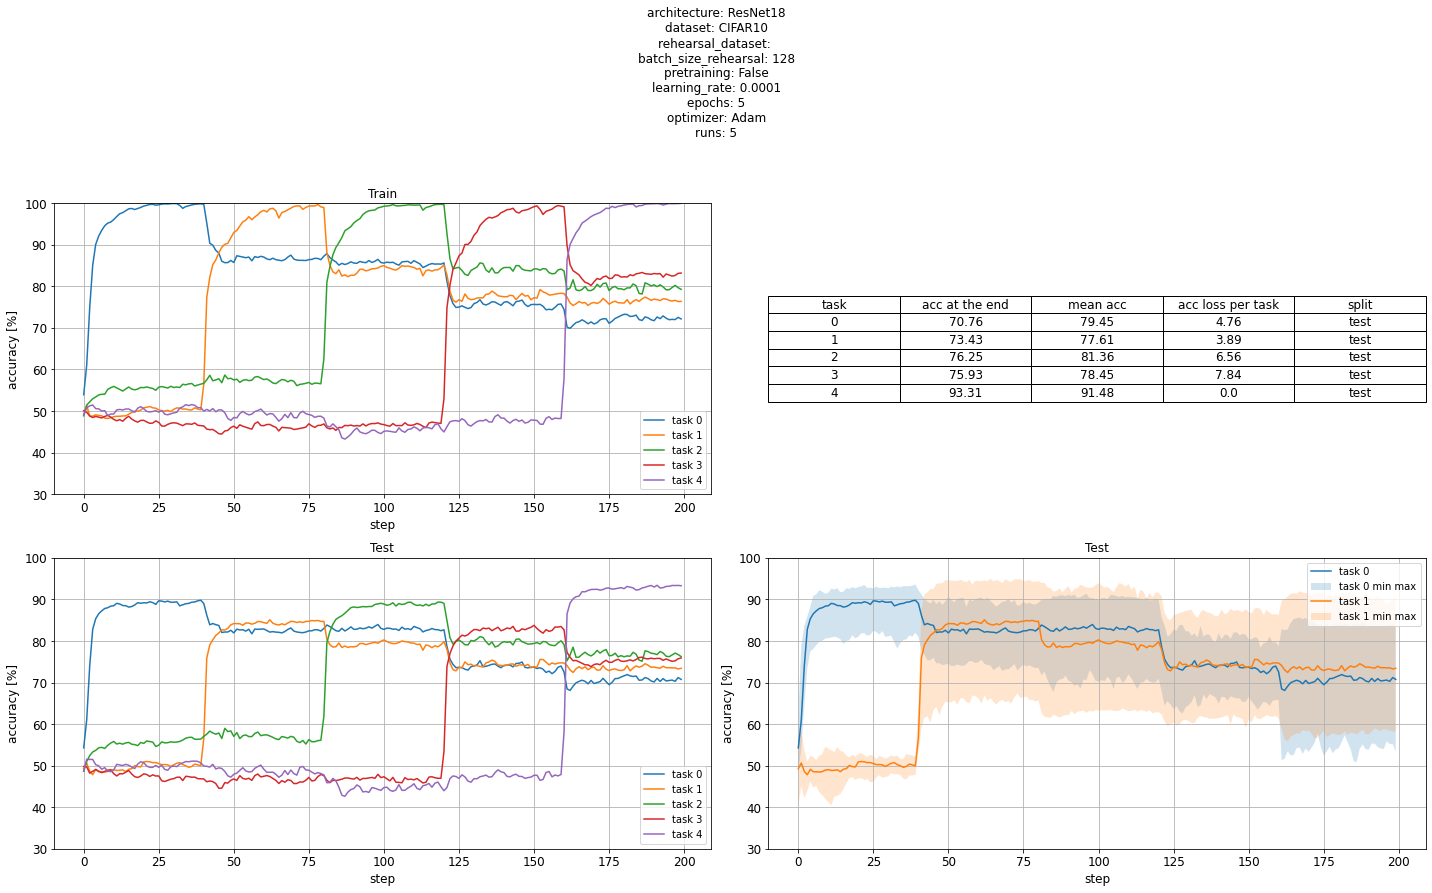

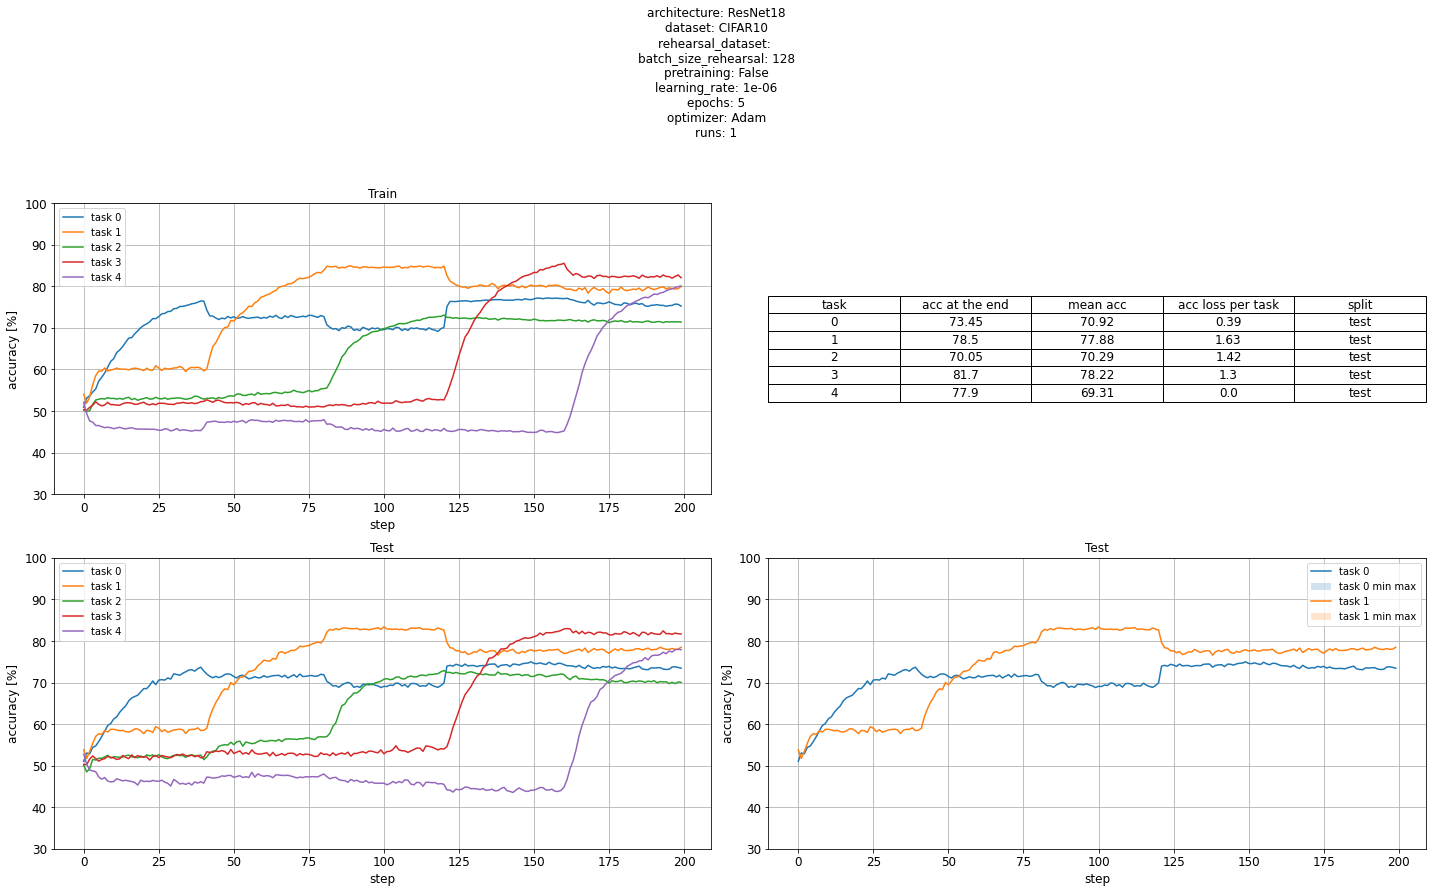

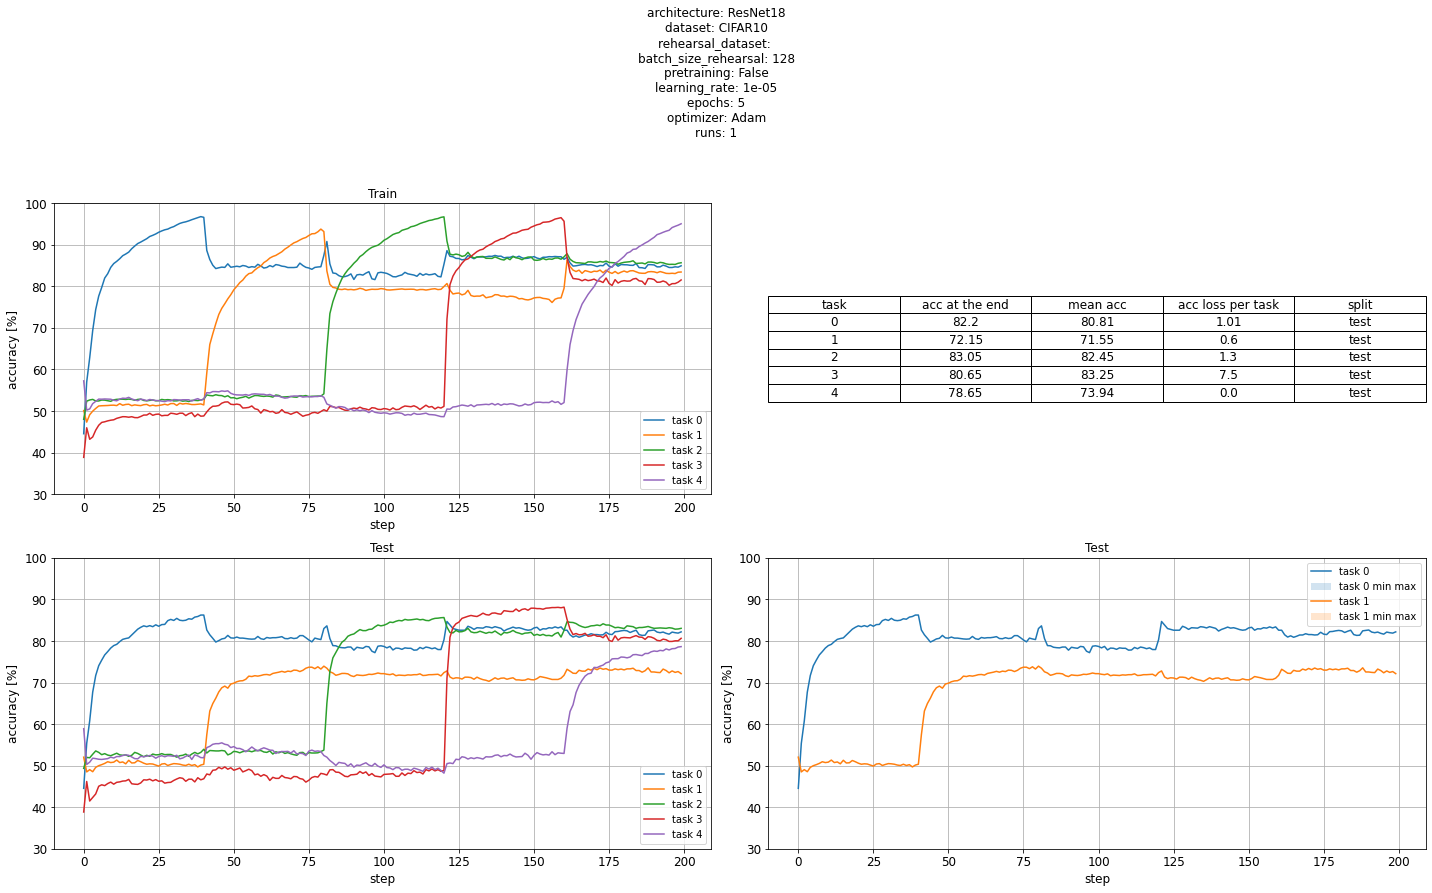

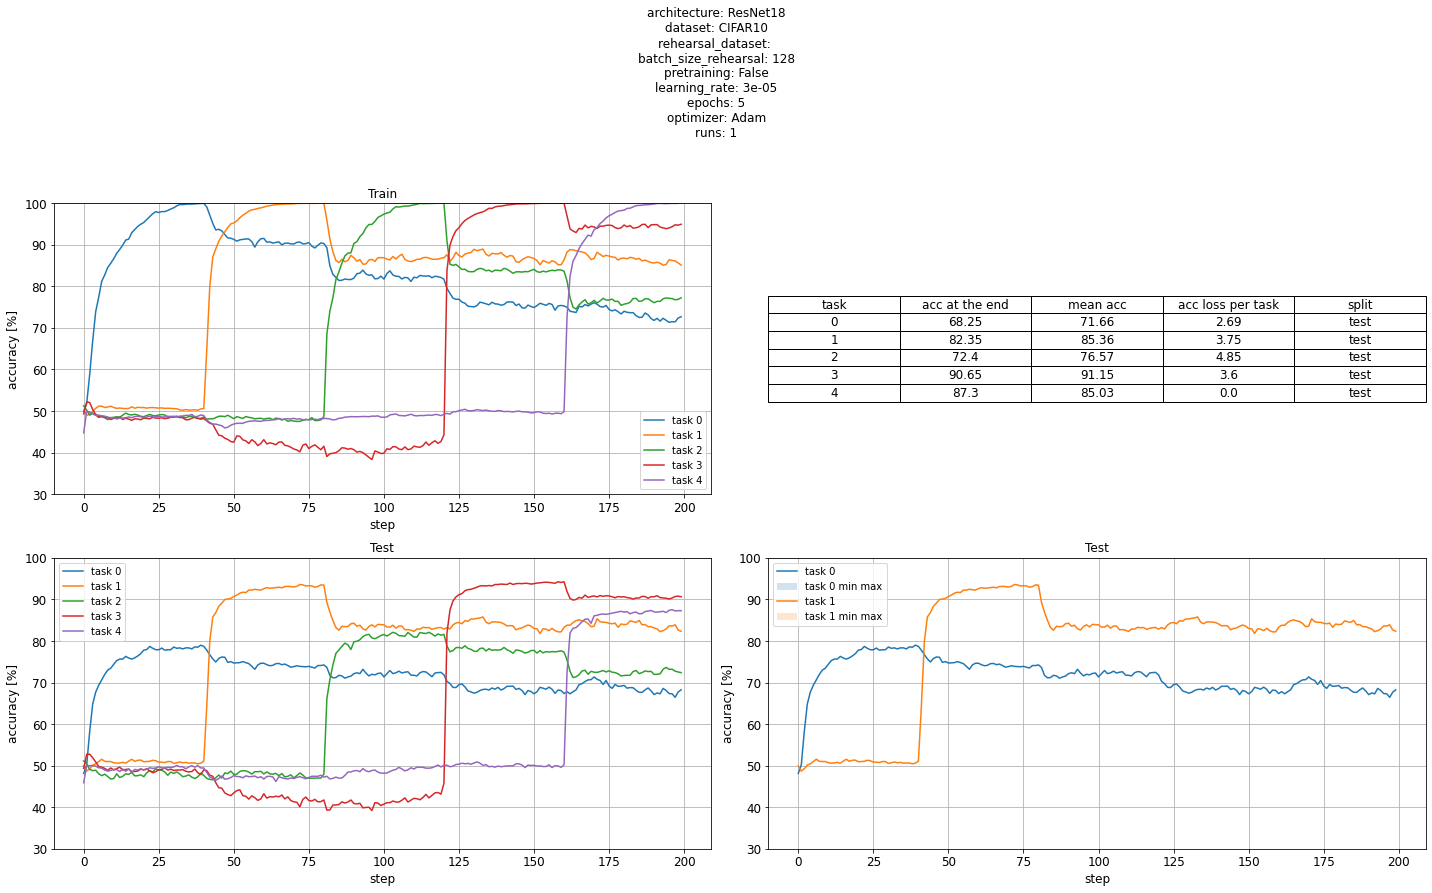

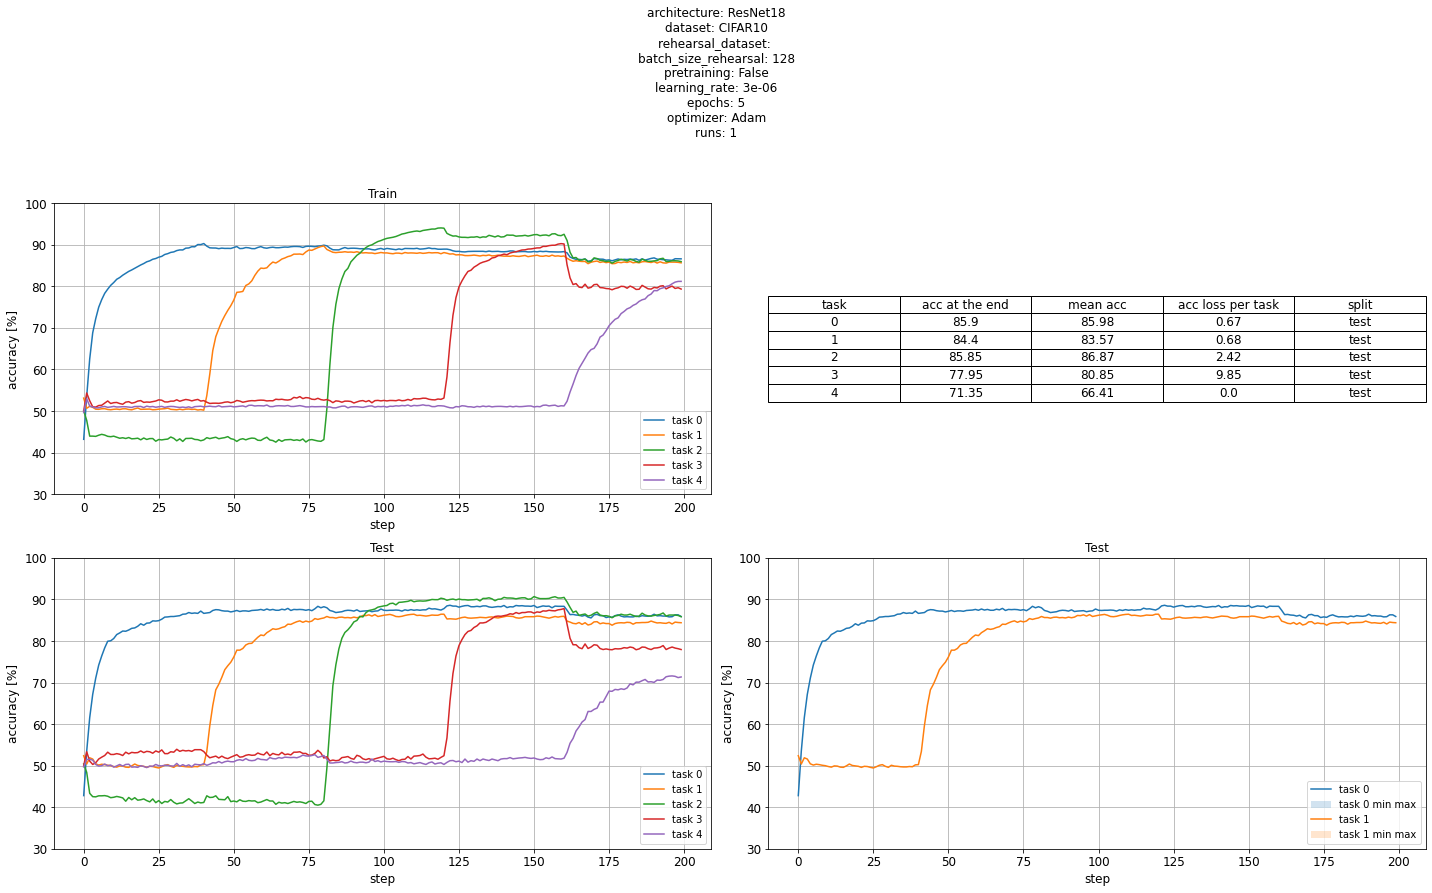

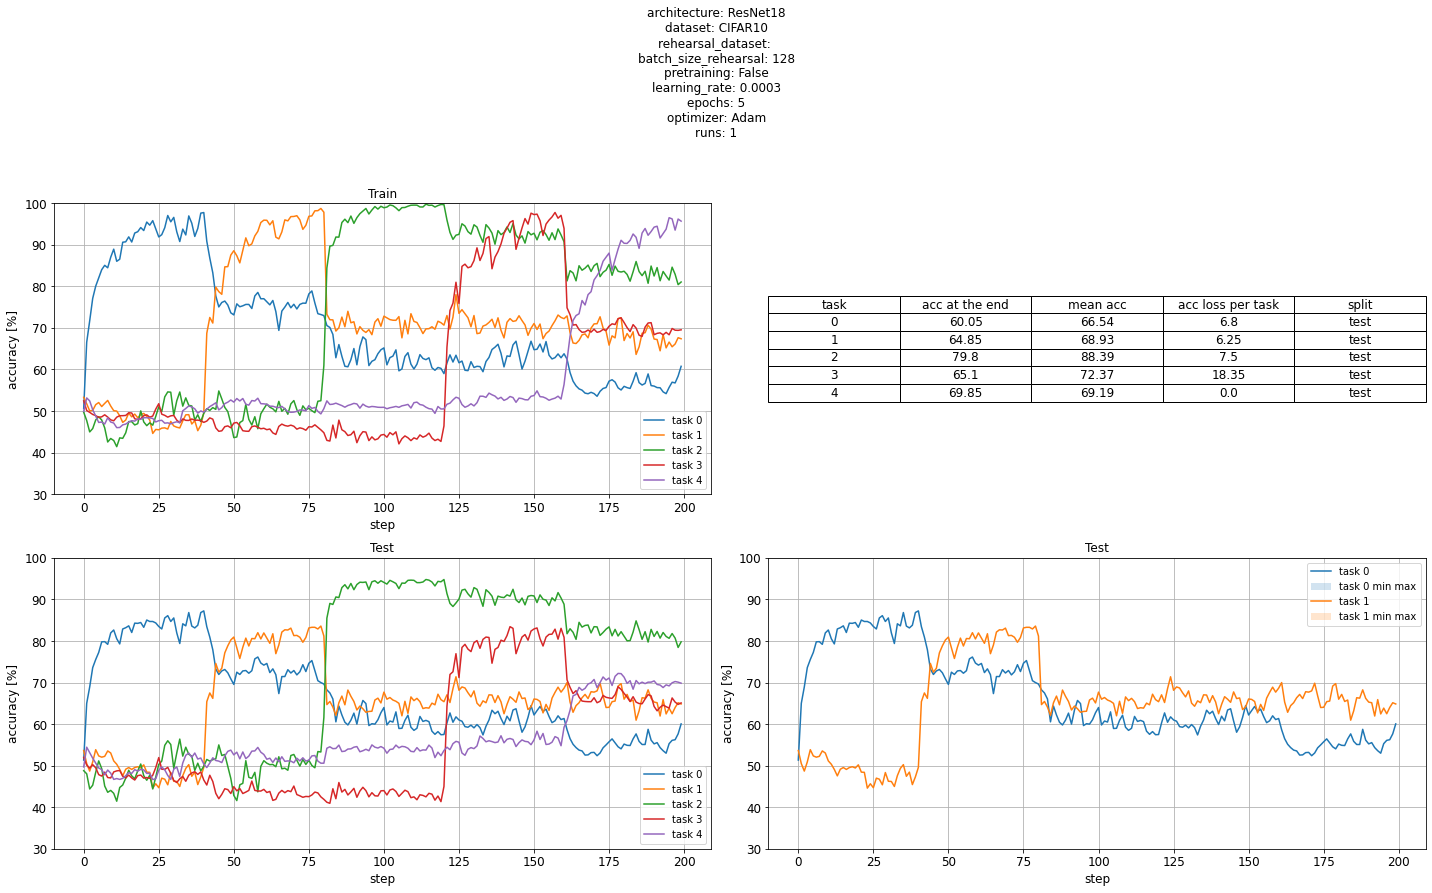

In [8]:
viz.plot_everything()